Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a machine learning technique that builds a model by combining the predictions of several simpler models, typically decision trees, to improve accuracy and robustness. Here’s a high-level overview of how it works:

1. **Base Model**: It starts with a base model, usually a simple decision tree.

2. **Residual Calculation**: The model's predictions are compared to the actual values, and the residuals (errors) are calculated.

3. **Fit to Residuals**: A new model is then trained to predict these residuals. Essentially, this model is trying to correct the errors made by the previous model.

4. **Update Predictions**: The predictions of the new model are added to the predictions of the previous model to update the overall prediction.

5. **Iterate**: Steps 2 through 4 are repeated for a number of iterations or until no further improvement can be made. Each new model focuses on correcting the errors of the combined models from the previous steps.

6. **Final Prediction**: The final prediction is the sum of the predictions from all the models.

Gradient Boosting Regression is effective because it incrementally builds up a strong model by focusing on the mistakes of previous models, leading to improved performance on complex datasets.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

 Let's walk through implementing a simple gradient boosting algorithm from scratch in Python using NumPy. We'll use a small synthetic regression dataset for this example.



## 1. Generating a Synthetic Dataset
We'll start by creating a small dataset for regression. This dataset will be simple and will help us focus on the gradient boosting implementation.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Generating a synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 samples, 1 feature
y = 3 * X.flatten() + 7 + np.random.normal(0, 1, X.shape[0])  # Linear relation with noise


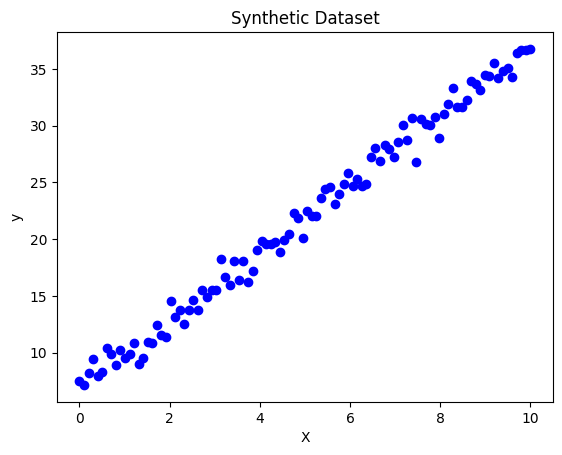

In [3]:

# Visualize the dataset
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Dataset')
plt.show()

##2. Implementing Gradient Boosting from Scratch
We'll implement a basic version of gradient boosting with decision stumps (trees with depth 1) as weak learners.



In [4]:
class GradientBoosting:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        residuals = y - self.initial_prediction

        for _ in range(self.n_estimators):
            model = self._fit_stump(X, residuals)
            prediction = model.predict(X)
            self.models.append(model)
            residuals -= self.learning_rate * prediction

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions

    def _fit_stump(self, X, residuals):
        # Simple decision stump: one split decision tree
        class DecisionStump:
            def __init__(self):
                self.split_value = None
                self.prediction_left = None
                self.prediction_right = None

            def fit(self, X, residuals):
                best_split = None
                best_mse = float('inf')
                for split_value in np.unique(X):
                    left_mask = X.flatten() <= split_value
                    right_mask = ~left_mask
                    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                        continue

                    prediction_left = np.mean(residuals[left_mask])
                    prediction_right = np.mean(residuals[right_mask])

                    mse = (np.mean((residuals[left_mask] - prediction_left) ** 2) +
                           np.mean((residuals[right_mask] - prediction_right) ** 2))

                    if mse < best_mse:
                        best_mse = mse
                        best_split = split_value
                        self.prediction_left = prediction_left
                        self.prediction_right = prediction_right

                self.split_value = best_split

            def predict(self, X):
                predictions = np.where(X.flatten() <= self.split_value,
                                      self.prediction_left,
                                      self.prediction_right)
                return predictions

        stump = DecisionStump()
        stump.fit(X, residuals)
        return stump


## 3. Training and Evaluating the Model
Now we'll train the gradient boosting model and evaluate its performance.



Mean Squared Error: 20.7438
R-squared: 0.7342


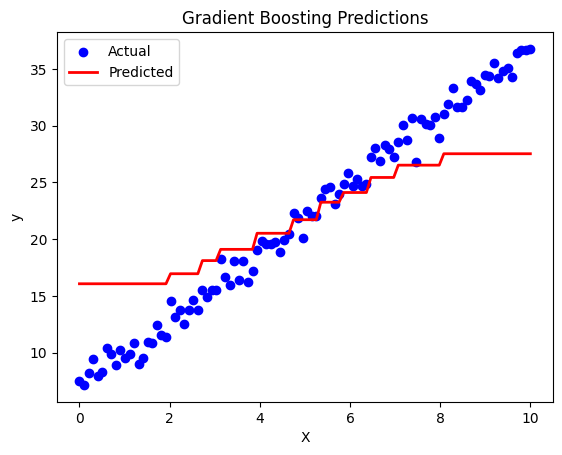

In [5]:
# Train the gradient boosting model
gb = GradientBoosting(n_estimators=10, learning_rate=0.1)
gb.fit(X, y)
y_pred = gb.predict(X)

# Evaluate performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the predictions
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Predictions')
plt.legend()
plt.show()


This is a basic implementation to demonstrate the concept. In practice, gradient boosting frameworks like XGBoost or LightGBM are used for more complex and optimized implementations.








Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

To optimize a model using different hyperparameters, you can use techniques like Grid Search or Random Search. Here's a general approach for performing this task:

### Steps:
1. **Select a model**: Choose the model you want to optimize (e.g., Gradient Boosting, Random Forest, etc.).
2. **Define the hyperparameters**: List the hyperparameters to tune, such as learning rate, number of trees, and tree depth.
3. **Set up the search strategy**:
   - **Grid Search**: Exhaustively searches through a manually specified subset of the hyperparameter space.
   - **Random Search**: Randomly samples from the hyperparameter space. It is generally faster when dealing with a large number of hyperparameters.
4. **Evaluate the performance**: Use cross-validation to evaluate the performance of each combination of hyperparameters.
5. **Choose the best model**: Select the hyperparameters that yield the best performance.




``

### Key Points:
- **Grid Search** is exhaustive but can be computationally expensive.
- **Random Search** can be more efficient for larger hyperparameter spaces.
- Use cross-validation to ensure robust performance evaluation.

These techniques allow you to find the best combination of hyperparameters for your specific model and dataset.

## Example: Using Grid Search with a Random Forest
Here is an example in Python using GridSearchCV to optimize hyperparameters for a Random Forest model:



In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [7]:
# Load dataset
data = load_iris()
X = data.data
y = data.target


In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize model
rf = RandomForestClassifier()


In [10]:
# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [11]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [12]:
# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [13]:
# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [14]:
# Evaluate performance on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


## Example: Using Random Search with a Gradient Boosting Classifier
Here is an example using RandomizedSearchCV for a Gradient Boosting model:



In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [16]:
# Initialize model
gb = GradientBoostingClassifier()


In [17]:
# Define hyperparameters
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

In [18]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


In [19]:
# Fit the model
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [20]:
# Best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}


In [21]:
# Evaluate performance on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


Q4. What is a weak learner in Gradient Boosting?

In **Gradient Boosting**, a **weak learner** refers to a model that performs only slightly better than random guessing. Specifically, decision trees are commonly used as weak learners in Gradient Boosting. These trees are usually shallow, containing only a few splits, and therefore, they are weak in their predictive power¹². The idea behind Gradient Boosting is to combine many such weak learners to create a strong ensemble model that improves prediction accuracy by sequentially minimizing the errors left over by previous models¹.

Q5. What is the intuition behind the Gradient Boosting algorithm?

Certainly! The intuition behind **Gradient Boosting** lies in combining many weak predictive models (usually decision trees) to create a strong ensemble model. Here's how it works:

1. **Initialization**: Start with a base model, which could be as simple as a decision tree. This model makes initial predictions for each instance in the dataset.
2. **Compute Residuals**: Calculate the residuals (errors) for each prediction. These residuals are the differences between the predicted and actual values.
3. **Build Successive Trees**: Each new tree in the sequence is built to predict the residuals of the previous tree. Essentially, it tries to correct the mistakes of its predecessors.
4. **Gradient Descent Step**: Adjust the model parameters to minimize the loss function. Gradually boosting is done by fitting the new trees to the negative gradient of the loss function.
5. **Combine Predictors**: The predictions from all trees are then combined through a weighted sum to make the final prediction. The weights are typically determined by the learning rate, which controls how fast the model learns.

**Key Features**:
- **Loss Function**: Gradient boosting can be used with different loss functions, making it adaptable to regression, classification, and other tasks.
- **Learning Rate**: This parameter controls the contribution of each tree to the final outcome. A smaller learning rate might require more trees but can lead to a more robust model.
- **Number of Trees**: Carefully tune the number of trees (boosting stages) to avoid underfitting or overfitting.

**Practical Applications**: Gradient boosting is versatile and widely used in finance (credit scoring), marketing (customer churn prediction), and healthcare (predictive diagnostics) due to its high predictive accuracy⁴.

Q5. What is the intuition behind the Gradient Boosting algorithm?

Certainly! The intuition behind **Gradient Boosting** lies in combining many weak predictive models (usually decision trees) to create a strong ensemble model. Here's how it works:

1. **Initialization**: Start with a base model, which could be as simple as a decision tree. This model makes initial predictions for each instance in the dataset.
2. **Compute Residuals**: Calculate the residuals (errors) for each prediction. These residuals are the differences between the predicted and actual values.
3. **Build Successive Trees**: Each new tree in the sequence is built to predict the residuals of the previous tree. Essentially, it tries to correct the mistakes of its predecessors.
4. **Gradient Descent Step**: Adjust the model parameters to minimize the loss function. Gradually boosting is done by fitting the new trees to the negative gradient of the loss function.
5. **Combine Predictors**: The predictions from all trees are then combined through a weighted sum to make the final prediction. The weights are typically determined by the learning rate, which controls how fast the model learns.

**Key Features**:
- **Loss Function**: Gradient boosting can be used with different loss functions, making it adaptable to regression, classification, and other tasks.
- **Learning Rate**: This parameter controls the contribution of each tree to the final outcome. A smaller learning rate might require more trees but can lead to a more robust model.
- **Number of Trees**: Carefully tune the number of trees (boosting stages) to avoid underfitting or overfitting.

**Practical Applications**: Gradient boosting is versatile and widely used in finance (credit scoring), marketing (customer churn prediction), and healthcare (predictive diagnostics) due to its high predictive accuracy⁴.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Certainly! **Gradient Boosting** is a powerful ensemble learning algorithm used for both classification and regression tasks. Let me break it down for you:

1. **Sequential Training**:
   - Gradient Boosting trains models sequentially, where each new model tries to correct the errors made by the previous one.
   - It combines several **weak learners** (often simple decision trees) into a **strong learner**.

2. **Loss Function Minimization**:
   - The algorithm minimizes a loss function (e.g., mean squared error or cross-entropy) of the previous model using **gradient descent**.
   - In each iteration, it computes the gradient of the loss function with respect to the current ensemble's predictions.
   - Then, it trains a new weak model to minimize this gradient.

3. **Residual Errors**:
   - Unlike AdaBoost, which adjusts instance weights, Gradient Boosting trains each predictor using **residual errors** of the predecessor as labels.
   - The residual errors represent the difference between the actual target values and the predictions made by the current ensemble.

4. **Ensemble Building**:
   - The ensemble consists of multiple trees (usually called **Gradient Boosted Trees**).
   - Each tree is trained using the feature matrix and the residual errors from the previous tree.
   - The process continues until a stopping criterion (e.g., maximum number of trees or minimum improvement) is met.

5. **Shrinkage**:
   - Shrinkage refers to scaling down the predictions of each tree by multiplying them with a **learning rate** (usually between 0 and 1).
   - This helps prevent overfitting and allows fine-tuning of the model's performance.

6. **Final Prediction**:
   - The final prediction is the sum of predictions from all trees:
     $$ y_{\text{pred}} = y_1 + (\eta \cdot r_1) + (\eta \cdot r_2) + \ldots + (\eta \cdot r_N) $$

In summary, Gradient Boosting builds an ensemble by iteratively improving weak models using gradient-based updates. It's a robust technique that often outperforms random forests!


Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

Certainly! Let's delve into the steps involved in constructing the mathematical intuition of the Gradient Boosting algorithm:

1. **Build a Base Model**:
   - Start by creating a base model (often a simple one, like the average of the output values) to predict the observations in the training dataset.

2. **Compute Pseudo Residuals**:
   - Calculate the residuals (errors) between the actual target values and the predictions made by the base model.
   - These residuals represent the part of the target variable that the base model couldn't capture.

3. **Build a Model on Calculated Residuals**:
   - Construct a new decision tree (weak learner) based on the residuals.
   - The goal is to improve the predictions by capturing the remaining patterns in the data.

4. **Compute Decision Tree Output**:
   - Add the newly created tree to the ensemble.
   - Combine it with the previous models, learning from their errors.
   - The combined model aims to minimize the loss function (e.g., mean squared error).

5. **Update Previous Model Predictions**:
   - Adjust the current model's prediction by adding the output of the new tree.
   - Gradually, the ensemble improves its predictions by iteratively adding trees and adjusting the predictions.

Remember, gradient boosting is an iterative process that sequentially combines weak models to create a strong ensemble. Each new tree focuses on the remaining errors, gradually improving the overall prediction performance⁴⁵⁶. 🌟

